# 1、import and install dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import mediapipe as mp
import time

# 2、keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic   # holistic model
# mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils  # drawing utilities

In [4]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  # BGR->RGB
    image.flags.writeable=False                 # image is no longer writeable
    results=model.process(image)                 # make prediction
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)  # RGB->BGR
    return image,results

In [5]:
def draw_landmarks(image,results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    # FACEMESH_CONTOURS
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # draw left hand  connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [6]:
def draw_styled_landmarks(image,results):
    # draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                            mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,0,121),thickness=1,circle_radius=1)
                             )
    # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)
                             )
    # draw left hand  connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                            mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)
                             )
    # draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)
                             )


In [7]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [8]:
#  查看draw_landmarks()函数
mp_drawing.draw_landmarks??

In [9]:
# Open capture
cap=cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        rer,frame=cap.read()

        # Make detection
        image,results=mediapipe_detection(frame,holistic)
        print(results)
        
        # Draw landmarkd
        draw_styled_landmarks(image,results)

        # Show to screen
        cv2.imshow('OpenCV Feed',image)

        # Break
        if cv2.waitKey(1) & 0xff==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results.face_landmarks
results.face_landmarks.landmark
len(results.face_landmarks.landmark)

468

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

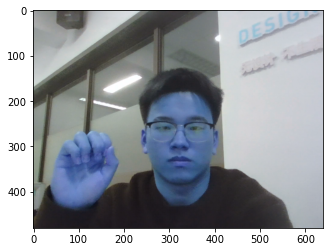

In [10]:
plt.imshow(frame)

In [11]:
draw_landmarks(frame,results)

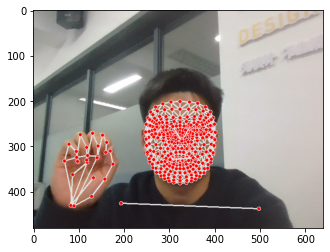

In [12]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3、Extract Keypoint Values

In [13]:
# results
results.pose_landmarks
len(results.pose_landmarks.landmark)

33

In [14]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [15]:
test
pose
len(pose)

33

In [16]:
# 简化代码
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [17]:
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [18]:
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [24]:
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
np.zeros(21*3).shape

(63,)

In [5]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose,face,lh,rh])


In [28]:
extract_keypoints(results).shape

(1662,)

In [29]:
(33*4)+(468*3)+(21*3)+(21*3)

1662

In [30]:
extract_keypoints(results)[:-10]

array([ 0.54802084,  0.71672213, -0.991166  , ...,  0.        ,
        0.        ,  0.        ])

In [32]:
res_test=extract_keypoints(results)
print(res_test)

# 保存numpy数据
np.save('test_0',res_test)

[ 0.54802084  0.71672213 -0.991166   ...  0.          0.
  0.        ]


In [33]:
# 读取npy文件
np.load('test_0.npy')

array([ 0.54802084,  0.71672213, -0.991166  , ...,  0.        ,
        0.        ,  0.        ])

# 4、Setup Folders for Collection

In [6]:
# Path for exported data,numpy array
DATA_PATH=os.path.join('MP_Data')

# Actions that we try detect
# 三个动作
actions=np.array(['normal','r_hand','a_hand'])

# 每一个动作30个视频，每一个视频有30帧
# Thirty videos worth for data
no_sequences=30

# videos are going to be 30 frames in length
suquence_length=30

In [36]:
# hello  # actions文件夹下存30个视频
## 0      # 每个视频的30帧存在一个子文件夹
## 1
## 2
## ...
## 29

# thanks

# i love you

In [9]:
# Make dirs
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5、Collect Keypoints Values for Training and Testing

In [10]:
# Open capture
cap=cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
    
    ## NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(suquence_length):

                # Read feed
                rer,frame=cap.read()

                # Make detection
                image,results=mediapipe_detection(frame,holistic)
                print(results)

                # Draw landmarkd
                draw_styled_landmarks(image,results)
                
                ## NEW Apply wait logic
                if frame_num==0:
                    cv2.putText(image,'Staring Collection...',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} video number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed',image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} video number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed',image)
                ## NEW Extrct Keypoints
                keypoints=extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                

                

                # Break
                if cv2.waitKey(1) & 0xff==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6、Preprocess Data and create Labels and Features

In [10]:
# 拆分train、test
from sklearn.model_selection import train_test_split
# one-hot编码
from tensorflow.keras.utils import to_categorical

In [15]:
label_map={label:num for num,label in enumerate(actions)}

In [16]:
label_map

{'normal': 0, 'r_hand': 1, 'a_hand': 2}

In [17]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(suquence_length):
            res=np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [18]:
sequences

[[array([ 0.54086864,  0.66520941, -1.02596962, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5400719 ,  0.66844589, -1.06586957, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53882611,  0.66981816, -1.06380916, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53742862,  0.66979581, -1.05977666, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5368343 ,  0.66964877, -1.05854869, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53607762,  0.66922206, -1.05531549, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53521413,  0.66919309, -1.05179334, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53418458,  0.66904074, -1.04103863, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53381008,  0.66924709, -1.04127049, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.53344512,  0.66924196, -1.03006756, ...,  0.        ,
       

In [19]:
np.array(sequences).shape     # 一个90个视频，每个视频30帧，每帧1662个关键点

(90, 30, 1662)

In [20]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [21]:
np.array(labels).shape       #  90个视频，对应90个标签

(90,)

In [22]:
x=np.array(sequences)

In [23]:
x.shape

(90, 30, 1662)

In [24]:
# label转换为one-hot编码
y=to_categorical(labels).astype(int)

In [25]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [26]:
# 划分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [30]:
90*0.05

4.5

In [31]:
x_train.shape

(85, 30, 1662)

In [32]:
y_train.shape

(85, 3)

# 7.Build and Train LSTM Neural Network

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [28]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [29]:
# 搭建模型
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [30]:
x.shape

(90, 30, 1662)

In [31]:
actions.shape[0]

3

In [32]:
res=[.7,0.2,0.1]
actions[np.argmax(res)]

'normal'

In [30]:
# 编译模型
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [31]:
# 执行训练
model.fit(x_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
1/3 [=========>....................] - ETA: 0s - loss: 1.1101 - categorical_accuracy: 0.3438WARNING:tensorflow:From C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
3/3 [==============================] - 0s 102ms/step - loss: 1.1005 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.0701 - categorical_accuracy: 0.4000
Epoch 3/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.0021 - categorical_accuracy: 0.5176
Epoch 4/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.9015 - categorical_accuracy: 0.7882
Epoch 5/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.7466 - categorical_accuracy: 0.9529
Epoch 6/2000
3/3 [==============================] - 0s 38ms/s

3/3 [==============================] - 0s 47ms/step - loss: 0.0927 - categorical_accuracy: 0.9765
Epoch 69/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0911 - categorical_accuracy: 0.9765
Epoch 70/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.0894 - categorical_accuracy: 0.9765
Epoch 71/2000
3/3 [==============================] - 0s 46ms/step - loss: 0.0881 - categorical_accuracy: 0.9765
Epoch 72/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0940 - categorical_accuracy: 0.9765
Epoch 73/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0847 - categorical_accuracy: 0.9765
Epoch 74/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0859 - categorical_accuracy: 0.9765
Epoch 75/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0805 - categorical_accuracy: 0.9765
Epoch 76/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0817 - categorical_accuracy: 0.9765
Epoch 

3/3 [==============================] - 0s 46ms/step - loss: 0.0539 - categorical_accuracy: 0.9882
Epoch 141/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0531 - categorical_accuracy: 0.9882
Epoch 142/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0585 - categorical_accuracy: 0.9882
Epoch 143/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0584 - categorical_accuracy: 0.9882
Epoch 144/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0517 - categorical_accuracy: 0.9882
Epoch 145/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0486 - categorical_accuracy: 0.9882
Epoch 146/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0528 - categorical_accuracy: 0.9882
Epoch 147/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0548 - categorical_accuracy: 0.9882
Epoch 148/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0533 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 42ms/step - loss: 0.0492 - categorical_accuracy: 0.9882
Epoch 213/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0435 - categorical_accuracy: 0.9882
Epoch 214/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0370 - categorical_accuracy: 0.9882
Epoch 215/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0450 - categorical_accuracy: 0.9882
Epoch 216/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0403 - categorical_accuracy: 0.9882
Epoch 217/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0346 - categorical_accuracy: 0.9882
Epoch 218/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0494 - categorical_accuracy: 0.9882
Epoch 219/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1876 - categorical_accuracy: 0.9176
Epoch 220/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1386 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 44ms/step - loss: 0.0520 - categorical_accuracy: 0.9882
Epoch 285/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0519 - categorical_accuracy: 0.9882
Epoch 286/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0520 - categorical_accuracy: 0.9882
Epoch 287/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0520 - categorical_accuracy: 0.9882
Epoch 288/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0520 - categorical_accuracy: 0.9882
Epoch 289/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0524 - categorical_accuracy: 0.9882
Epoch 290/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0518 - categorical_accuracy: 0.9882
Epoch 291/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0517 - categorical_accuracy: 0.9882
Epoch 292/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0515 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 43ms/step - loss: 0.0523 - categorical_accuracy: 0.9882
Epoch 357/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0625 - categorical_accuracy: 0.9765
Epoch 358/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0569 - categorical_accuracy: 0.9882
Epoch 359/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0609 - categorical_accuracy: 0.9882
Epoch 360/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0755 - categorical_accuracy: 0.9765
Epoch 361/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0563 - categorical_accuracy: 0.9882
Epoch 362/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1168 - categorical_accuracy: 0.9765
Epoch 363/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0590 - categorical_accuracy: 0.9882
Epoch 364/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0696 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 40ms/step - loss: 0.0499 - categorical_accuracy: 0.9882
Epoch 429/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0497 - categorical_accuracy: 0.9882
Epoch 430/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0494 - categorical_accuracy: 0.9882
Epoch 431/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0495 - categorical_accuracy: 0.9882
Epoch 432/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0489 - categorical_accuracy: 0.9882
Epoch 433/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0485 - categorical_accuracy: 0.9882
Epoch 434/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0482 - categorical_accuracy: 0.9882
Epoch 435/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0490 - categorical_accuracy: 0.9882
Epoch 436/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0387 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 36ms/step - loss: 0.0489 - categorical_accuracy: 0.9882
Epoch 501/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0491 - categorical_accuracy: 0.9882
Epoch 502/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0485 - categorical_accuracy: 0.9882
Epoch 503/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0489 - categorical_accuracy: 0.9882
Epoch 504/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0480 - categorical_accuracy: 0.9882
Epoch 505/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0469 - categorical_accuracy: 0.9882
Epoch 506/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0460 - categorical_accuracy: 0.9882
Epoch 507/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0457 - categorical_accuracy: 0.9882
Epoch 508/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0437 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 37ms/step - loss: 0.0639 - categorical_accuracy: 0.9882
Epoch 573/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0670 - categorical_accuracy: 0.9882
Epoch 574/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0655 - categorical_accuracy: 0.9882
Epoch 575/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0621 - categorical_accuracy: 0.9882
Epoch 576/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0603 - categorical_accuracy: 0.9882
Epoch 577/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0554 - categorical_accuracy: 0.9882
Epoch 578/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0553 - categorical_accuracy: 0.9882
Epoch 579/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.0520 - categorical_accuracy: 0.9882
Epoch 580/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0514 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 38ms/step - loss: 0.0587 - categorical_accuracy: 0.9882
Epoch 645/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0583 - categorical_accuracy: 0.9882
Epoch 646/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0575 - categorical_accuracy: 0.9882
Epoch 647/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0551 - categorical_accuracy: 0.9882
Epoch 648/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0541 - categorical_accuracy: 0.9882
Epoch 649/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0512 - categorical_accuracy: 0.9882
Epoch 650/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0513 - categorical_accuracy: 0.9882
Epoch 651/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0500 - categorical_accuracy: 0.9882
Epoch 652/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0489 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 37ms/step - loss: 0.1294 - categorical_accuracy: 0.9647
Epoch 717/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0700 - categorical_accuracy: 0.9882
Epoch 718/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.1537 - categorical_accuracy: 0.9765
Epoch 719/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1325 - categorical_accuracy: 0.9529
Epoch 720/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0974 - categorical_accuracy: 0.9765
Epoch 721/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.1006 - categorical_accuracy: 0.9765
Epoch 722/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.1273 - categorical_accuracy: 0.9647
Epoch 723/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.1013 - categorical_accuracy: 0.9647
Epoch 724/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0840 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 38ms/step - loss: 0.0549 - categorical_accuracy: 0.9882
Epoch 789/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0570 - categorical_accuracy: 0.9882
Epoch 790/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.0567 - categorical_accuracy: 0.9882
Epoch 791/2000
3/3 [==============================] - 0s 40ms/step - loss: 0.0535 - categorical_accuracy: 0.9882
Epoch 792/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0489 - categorical_accuracy: 0.9882
Epoch 793/2000
3/3 [==============================] - 0s 41ms/step - loss: 0.0477 - categorical_accuracy: 0.9882
Epoch 794/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0455 - categorical_accuracy: 0.9882
Epoch 795/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0345 - categorical_accuracy: 0.9882
Epoch 796/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0337 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 36ms/step - loss: 0.0774 - categorical_accuracy: 0.9765
Epoch 861/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0805 - categorical_accuracy: 0.9765
Epoch 862/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0799 - categorical_accuracy: 0.9765
Epoch 863/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0762 - categorical_accuracy: 0.9765
Epoch 864/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0735 - categorical_accuracy: 0.9765
Epoch 865/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0700 - categorical_accuracy: 0.9765
Epoch 866/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.0651 - categorical_accuracy: 0.9765
Epoch 867/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.0603 - categorical_accuracy: 0.9765
Epoch 868/2000
3/3 [==============================] - 0s 38ms/step - loss: 0.0499 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 37ms/step - loss: 1.3763e-04 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.3603e-04 - categorical_accuracy: 1.0000
Epoch 933/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.3291e-04 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.3142e-04 - categorical_accuracy: 1.0000
Epoch 935/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.2911e-04 - categorical_accuracy: 1.0000
Epoch 936/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.2685e-04 - categorical_accuracy: 1.0000
Epoch 937/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.2458e-04 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.2266e-04 - categorical_accuracy: 1.0000
Epoch 939/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.20

3/3 [==============================] - 0s 37ms/step - loss: 5.9027e-05 - categorical_accuracy: 1.0000
Epoch 1002/2000
3/3 [==============================] - 0s 36ms/step - loss: 5.8498e-05 - categorical_accuracy: 1.0000
Epoch 1003/2000
3/3 [==============================] - 0s 43ms/step - loss: 5.8061e-05 - categorical_accuracy: 1.0000
Epoch 1004/2000
3/3 [==============================] - 0s 36ms/step - loss: 5.7562e-05 - categorical_accuracy: 1.0000
Epoch 1005/2000
3/3 [==============================] - 0s 37ms/step - loss: 5.7130e-05 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 36ms/step - loss: 5.6647e-05 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 41ms/step - loss: 5.6204e-05 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 37ms/step - loss: 5.5820e-05 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 36ms/step - lo

3/3 [==============================] - 0s 35ms/step - loss: 3.6950e-05 - categorical_accuracy: 1.0000
Epoch 1071/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.6752e-05 - categorical_accuracy: 1.0000
Epoch 1072/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.6547e-05 - categorical_accuracy: 1.0000
Epoch 1073/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.6345e-05 - categorical_accuracy: 1.0000
Epoch 1074/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.6153e-05 - categorical_accuracy: 1.0000
Epoch 1075/2000
3/3 [==============================] - 0s 35ms/step - loss: 3.5948e-05 - categorical_accuracy: 1.0000
Epoch 1076/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.5738e-05 - categorical_accuracy: 1.0000
Epoch 1077/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.5550e-05 - categorical_accuracy: 1.0000
Epoch 1078/2000
3/3 [==============================] - 0s 38ms/step - lo

3/3 [==============================] - 0s 36ms/step - loss: 2.6263e-05 - categorical_accuracy: 1.0000
Epoch 1140/2000
3/3 [==============================] - 0s 36ms/step - loss: 2.6159e-05 - categorical_accuracy: 1.0000
Epoch 1141/2000
3/3 [==============================] - 0s 36ms/step - loss: 2.6034e-05 - categorical_accuracy: 1.0000
Epoch 1142/2000
3/3 [==============================] - 0s 36ms/step - loss: 2.5923e-05 - categorical_accuracy: 1.0000
Epoch 1143/2000
3/3 [==============================] - 0s 37ms/step - loss: 2.5796e-05 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 37ms/step - loss: 2.5682e-05 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.5587e-05 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 35ms/step - loss: 2.5461e-05 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 37ms/step - lo

3/3 [==============================] - 0s 39ms/step - loss: 1.9872e-05 - categorical_accuracy: 1.0000
Epoch 1209/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.9794e-05 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 38ms/step - loss: 1.9717e-05 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.9642e-05 - categorical_accuracy: 1.0000
Epoch 1212/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.9575e-05 - categorical_accuracy: 1.0000
Epoch 1213/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.9515e-05 - categorical_accuracy: 1.0000
Epoch 1214/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.9428e-05 - categorical_accuracy: 1.0000
Epoch 1215/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.9358e-05 - categorical_accuracy: 1.0000
Epoch 1216/2000
3/3 [==============================] - 0s 37ms/step - lo

3/3 [==============================] - 0s 38ms/step - loss: 1.5630e-05 - categorical_accuracy: 1.0000
Epoch 1278/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.5588e-05 - categorical_accuracy: 1.0000
Epoch 1279/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.5537e-05 - categorical_accuracy: 1.0000
Epoch 1280/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.5484e-05 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 38ms/step - loss: 1.5438e-05 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.5382e-05 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.5337e-05 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.5291e-05 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 37ms/step - lo

3/3 [==============================] - 0s 37ms/step - loss: 1.2658e-05 - categorical_accuracy: 1.0000
Epoch 1347/2000
3/3 [==============================] - 0s 35ms/step - loss: 1.2632e-05 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.2594e-05 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.2555e-05 - categorical_accuracy: 1.0000
Epoch 1350/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.2524e-05 - categorical_accuracy: 1.0000
Epoch 1351/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.2489e-05 - categorical_accuracy: 1.0000
Epoch 1352/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.2458e-05 - categorical_accuracy: 1.0000
Epoch 1353/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.2417e-05 - categorical_accuracy: 1.0000
Epoch 1354/2000
3/3 [==============================] - 0s 37ms/step - lo

3/3 [==============================] - 0s 37ms/step - loss: 1.0455e-05 - categorical_accuracy: 1.0000
Epoch 1416/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.0431e-05 - categorical_accuracy: 1.0000
Epoch 1417/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.0406e-05 - categorical_accuracy: 1.0000
Epoch 1418/2000
3/3 [==============================] - 0s 36ms/step - loss: 1.0386e-05 - categorical_accuracy: 1.0000
Epoch 1419/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0360e-05 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0326e-05 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0297e-05 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 35ms/step - loss: 1.0274e-05 - categorical_accuracy: 1.0000
Epoch 1423/2000
3/3 [==============================] - 0s 36ms/step - lo

3/3 [==============================] - 0s 39ms/step - loss: 8.7625e-06 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 37ms/step - loss: 8.7358e-06 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 37ms/step - loss: 8.7106e-06 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 38ms/step - loss: 8.6881e-06 - categorical_accuracy: 1.0000
Epoch 1488/2000
3/3 [==============================] - 0s 39ms/step - loss: 8.6671e-06 - categorical_accuracy: 1.0000
Epoch 1489/2000
3/3 [==============================] - 0s 39ms/step - loss: 8.6545e-06 - categorical_accuracy: 1.0000
Epoch 1490/2000
3/3 [==============================] - 0s 38ms/step - loss: 8.6348e-06 - categorical_accuracy: 1.0000
Epoch 1491/2000
3/3 [==============================] - 0s 36ms/step - loss: 8.6082e-06 - categorical_accuracy: 1.0000
Epoch 1492/2000
3/3 [==============================] - 0s 36ms/step - lo

3/3 [==============================] - 0s 41ms/step - loss: 7.4091e-06 - categorical_accuracy: 1.0000
Epoch 1554/2000
3/3 [==============================] - 0s 38ms/step - loss: 7.3993e-06 - categorical_accuracy: 1.0000
Epoch 1555/2000
3/3 [==============================] - 0s 43ms/step - loss: 7.3867e-06 - categorical_accuracy: 1.0000
Epoch 1556/2000
3/3 [==============================] - 0s 46ms/step - loss: 7.3685e-06 - categorical_accuracy: 1.0000
Epoch 1557/2000
3/3 [==============================] - 0s 41ms/step - loss: 7.3516e-06 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 39ms/step - loss: 7.3306e-06 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 45ms/step - loss: 7.3095e-06 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 43ms/step - loss: 7.2927e-06 - categorical_accuracy: 1.0000
Epoch 1561/2000
3/3 [==============================] - 0s 38ms/step - lo

3/3 [==============================] - 0s 37ms/step - loss: 6.3447e-06 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 40ms/step - loss: 6.3335e-06 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 0s 39ms/step - loss: 6.3222e-06 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 0s 39ms/step - loss: 6.3054e-06 - categorical_accuracy: 1.0000
Epoch 1626/2000
3/3 [==============================] - 0s 48ms/step - loss: 6.2872e-06 - categorical_accuracy: 1.0000
Epoch 1627/2000
3/3 [==============================] - 0s 41ms/step - loss: 6.2774e-06 - categorical_accuracy: 1.0000
Epoch 1628/2000
3/3 [==============================] - 0s 41ms/step - loss: 6.2591e-06 - categorical_accuracy: 1.0000
Epoch 1629/2000
3/3 [==============================] - 0s 38ms/step - loss: 6.2437e-06 - categorical_accuracy: 1.0000
Epoch 1630/2000
3/3 [==============================] - 0s 38ms/step - lo

3/3 [==============================] - 0s 39ms/step - loss: 5.4892e-06 - categorical_accuracy: 1.0000
Epoch 1692/2000
3/3 [==============================] - 0s 38ms/step - loss: 5.4752e-06 - categorical_accuracy: 1.0000
Epoch 1693/2000
3/3 [==============================] - 0s 38ms/step - loss: 5.4611e-06 - categorical_accuracy: 1.0000
Epoch 1694/2000
3/3 [==============================] - 0s 38ms/step - loss: 5.4485e-06 - categorical_accuracy: 1.0000
Epoch 1695/2000
3/3 [==============================] - 0s 37ms/step - loss: 5.4345e-06 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 39ms/step - loss: 5.4261e-06 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 38ms/step - loss: 5.4163e-06 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 38ms/step - loss: 5.4050e-06 - categorical_accuracy: 1.0000
Epoch 1699/2000
3/3 [==============================] - 0s 41ms/step - lo

3/3 [==============================] - 0s 39ms/step - loss: 4.7417e-06 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 41ms/step - loss: 4.7319e-06 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 40ms/step - loss: 4.7221e-06 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 40ms/step - loss: 4.7150e-06 - categorical_accuracy: 1.0000
Epoch 1764/2000
3/3 [==============================] - 0s 39ms/step - loss: 4.7080e-06 - categorical_accuracy: 1.0000
Epoch 1765/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.6968e-06 - categorical_accuracy: 1.0000
Epoch 1766/2000
3/3 [==============================] - 0s 39ms/step - loss: 4.6870e-06 - categorical_accuracy: 1.0000
Epoch 1767/2000
3/3 [==============================] - 0s 40ms/step - loss: 4.6716e-06 - categorical_accuracy: 1.0000
Epoch 1768/2000
3/3 [==============================] - 0s 41ms/step - lo

3/3 [==============================] - 0s 37ms/step - loss: 4.1190e-06 - categorical_accuracy: 1.0000
Epoch 1830/2000
3/3 [==============================] - 0s 36ms/step - loss: 4.1134e-06 - categorical_accuracy: 1.0000
Epoch 1831/2000
3/3 [==============================] - 0s 39ms/step - loss: 4.1050e-06 - categorical_accuracy: 1.0000
Epoch 1832/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.0952e-06 - categorical_accuracy: 1.0000
Epoch 1833/2000
3/3 [==============================] - 0s 37ms/step - loss: 4.0797e-06 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.0755e-06 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 37ms/step - loss: 4.0657e-06 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 37ms/step - loss: 4.0601e-06 - categorical_accuracy: 1.0000
Epoch 1837/2000
3/3 [==============================] - 0s 38ms/step - lo

3/3 [==============================] - 0s 37ms/step - loss: 3.6015e-06 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 39ms/step - loss: 3.5959e-06 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.5875e-06 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.5805e-06 - categorical_accuracy: 1.0000
Epoch 1902/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.5735e-06 - categorical_accuracy: 1.0000
Epoch 1903/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.5678e-06 - categorical_accuracy: 1.0000
Epoch 1904/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.5622e-06 - categorical_accuracy: 1.0000
Epoch 1905/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.5524e-06 - categorical_accuracy: 1.0000
Epoch 1906/2000
3/3 [==============================] - 0s 38ms/step - lo

3/3 [==============================] - 0s 37ms/step - loss: 3.1387e-06 - categorical_accuracy: 1.0000
Epoch 1968/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.1359e-06 - categorical_accuracy: 1.0000
Epoch 1969/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.1275e-06 - categorical_accuracy: 1.0000
Epoch 1970/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.1247e-06 - categorical_accuracy: 1.0000
Epoch 1971/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.1177e-06 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.1092e-06 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 36ms/step - loss: 3.1064e-06 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 37ms/step - loss: 3.1008e-06 - categorical_accuracy: 1.0000
Epoch 1975/2000
3/3 [==============================] - 0s 37ms/step - lo

# 8.Make Predictions

In [34]:
res=model.predict(x_test)

In [35]:
np.sum(res[0])

1.0000001

In [38]:
actions[np.argmax(res[0])]

'normal'

In [39]:
actions[np.argmax(y_test[0])]

'normal'

# 9.Save Weights

In [32]:
model.save('action-03-gpu1.h5')

In [79]:
del model

In [41]:
model.load_weights('action-03.h5')

# 10.Evaluation using Confusion Matrix and Accuray

In [42]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [43]:
yhat=model.predict(x_train)

In [44]:
ytrue=np.argmax(y_train,axis=1).tolist()
yhat=np.argmax(yhat,axis=1).tolist()

In [45]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[57,  0],
        [ 0, 28]],

       [[56,  1],
        [ 0, 28]],

       [[56,  0],
        [ 1, 28]]], dtype=int64)

In [46]:
accuracy_score(ytrue,yhat)

0.9882352941176471

# 11.Test in Real Time

In [47]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-60:]
        
        if len(sequence) == 60:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)],np.max(res))
            
            
            # 3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

double 1.0
double 1.0
double 1.0
double 1.0
single 1.0
double 1.0
double 1.0
double 1.0
double 1.0
double 1.0
single 1.0
double 1.0
double 1.0
single 1.0
double 1.0
single 1.0
double 1.0
single 1.0
double 1.0
double 1.0
double 1.0
single 1.0
single 1.0
single 1.0
single 1.0
single 1.0
double 1.0
double 1.0
single 1.0
double 1.0
double 1.0
single 1.0
single 1.0
double 1.0
double 1.0
double 1.0
double 1.0
double 1.0
double 1.0
double 1.0
double 1.0
single 1.0
double 1.0
double 1.0
single 1.0
double 1.0
single 1.0
double 1.0
single 0.99856275
single 0.99999917
double 1.0
double 1.0
double 1.0
single 1.0
double 1.0
double 1.0
double 1.0
single 1.0
double 1.0
double 1.0
double 1.0
double 1.0
single 1.0
single 1.0
double 1.0
single 1.0
double 1.0
double 1.0
double 0.9980276
single 1.0
double 1.0
single 1.0
double 1.0
single 1.0
double 1.0
double 1.0
single 1.0
single 1.0
single 1.0
double 1.0
single 0.99832445
double 1.0
double 1.0
double 1.0
single 1.0
single 1.0
double 1.0
double 1.0
singl

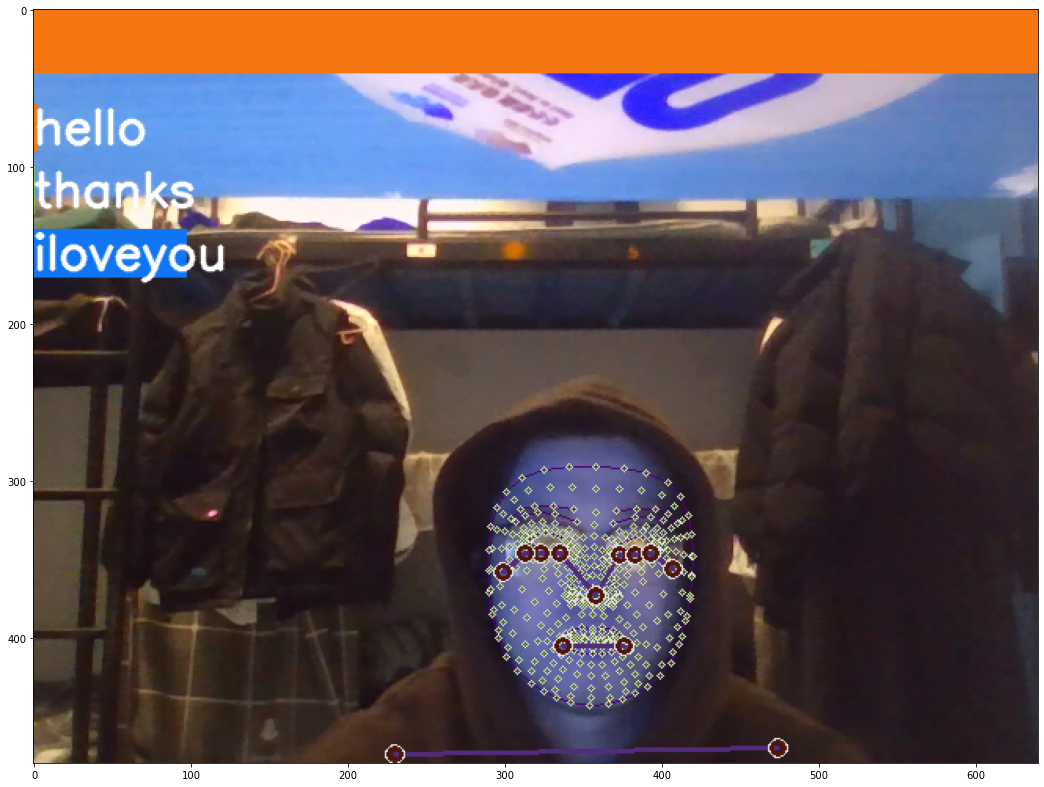

In [149]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [48]:
#### 最终优化
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
normal
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.SolutionOutputs'>
r_hand
<class 'mediapipe.python.solution_base.S

In [148]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
# explain  np.expand_dims 
model.predict(x_test[0])

In [ ]:
x_test[0].shape

In [ ]:
(num_sequences,30,1162)

In [ ]:
np.expand_dims(x_test[0],axis=0)

In [ ]:
np.expand_dims(x_test[0],axis=0).shape

In [1]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            0.15.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size

selenium                           4.8.2
Send2Trash                         1.8.0
setuptools                         58.0.4
simplegeneric                      0.8.1
singledispatch                     3.7.0
sip                                4.19.13
six                                1.15.0
sniffio                            1.2.0
snowballstemmer                    2.1.0
sortedcollections                  2.1.0
sortedcontainers                   2.4.0
soupsieve                          2.2.1
Sphinx                             4.2.0
sphinxcontrib-applehelp            1.0.2
sphinxcontrib-devhelp              1.0.2
sphinxcontrib-htmlhelp             2.0.0
sphinxcontrib-jsmath               1.0.1
sphinxcontrib-qthelp               1.0.3
sphinxcontrib-serializinghtml      1.1.5
sphinxcontrib-websupport           1.2.4
spyder                             5.1.5
spyder-kernels                     2.1.3
SQLAlchemy                         1.4.22
statsmodels                        0.12.2
sympy     